In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#Exchange rate between USD and YEN

In [14]:
exchange = pd.read_csv("DEXJPUS.csv")
exchange_2023 = pd.read_csv("USD_YEN_exchange.csv")
#renaming colums to make two consistent
exchange2 = exchange_2023.rename(columns = {'Date':'dates','Value':'rates'},inplace = False)
exchange2.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13479 entries, 0 to 13478
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dates   13479 non-null  object 
 1   rates   13479 non-null  float64
dtypes: float64(1), object(1)
memory usage: 210.7+ KB


In [13]:
exchange.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8350 entries, 0 to 8349
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dates   8350 non-null   object 
 1   rates   8350 non-null   float64
dtypes: float64(1), object(1)
memory usage: 130.6+ KB


In [16]:
#merging two dataset
exchange = exchange.merge(exchange2, how='outer', sort=True)
exchange

,dates,rates
0,1971-01-04,357.7300
1,1971-01-05,357.8100
2,1971-01-06,357.8600
3,1971-01-07,357.8700
4,1971-01-08,357.8200
...,...,...
20699,2023-04-21,134.1650
20700,2023-04-22,134.1650
20701,2023-04-24,134.1065
20702,2023-04-25,133.8560


In [4]:
#dropping unusual row
exchange = exchange.drop(exchange.index[exchange['dates']=='dates'],axis=0,inplace=True)

#Exchange rate data visualization(line chart)

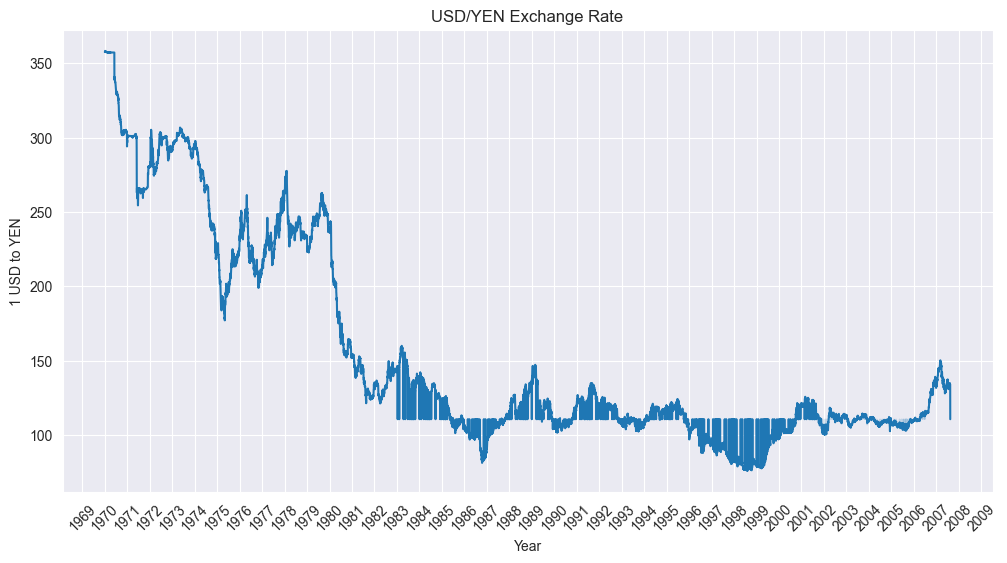

In [17]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x="dates", y="rates", data=exchange, ax=ax)

# set axis labels and plot title
ax.set_xlabel("Year")
ax.set_ylabel("1 USD to YEN")
ax.set_title("USD/YEN Exchange Rate")

# format x-axis tick labels as years
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.tick_params(axis='x', labelrotation=45)

# display plot
plt.show()


#narrowing our range from 2000 to 2023

In [36]:
#getting the row index of 2000-01-03
exchange.index[exchange['dates']=='2000-01-03']

Int64Index([9225], dtype='int64')

In [40]:
#slicing old df to new df
exchange_2000_2023 = exchange[9225:]

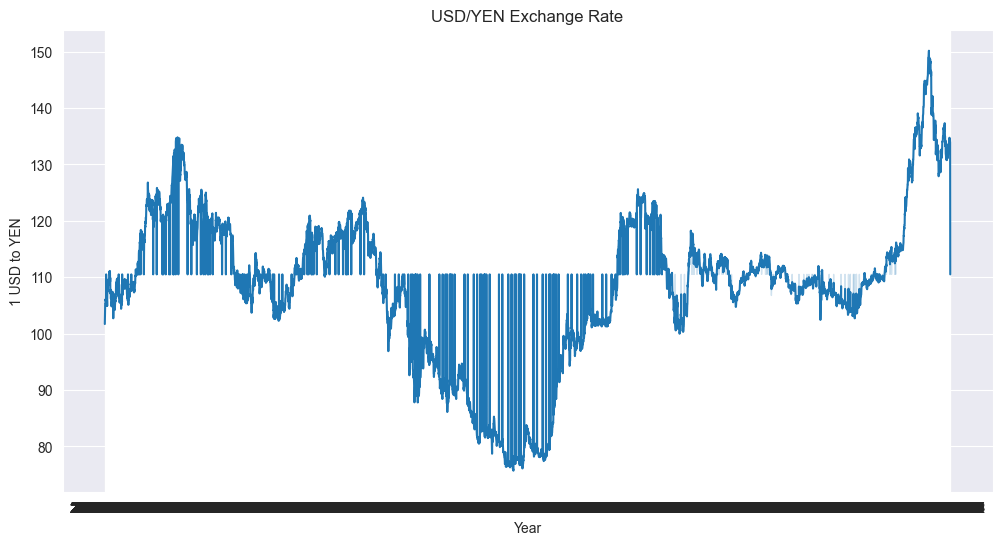

In [38]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x="dates", y="rates", data=exchange_2000_2023, ax=ax)

# set axis labels and plot title
ax.set_xlabel("Year")
ax.set_ylabel("1 USD to YEN")
ax.set_title("USD/YEN Exchange Rate")


# display plot
plt.show()

# 10 years exchange rate graph

In [46]:
exchange.index[exchange['dates']=='2013-01-01']
#slicing old df to new df
exchange_2013_2023 = exchange[15555:]

,dates,rates
15555,2013-01-01,110.5000
15556,2013-01-02,87.1000
15557,2013-01-03,86.9000
15558,2013-01-03,86.9200
15559,2013-01-04,88.1000
...,...,...
20699,2023-04-21,134.1650
20700,2023-04-22,134.1650
20701,2023-04-24,134.1065
20702,2023-04-25,133.8560


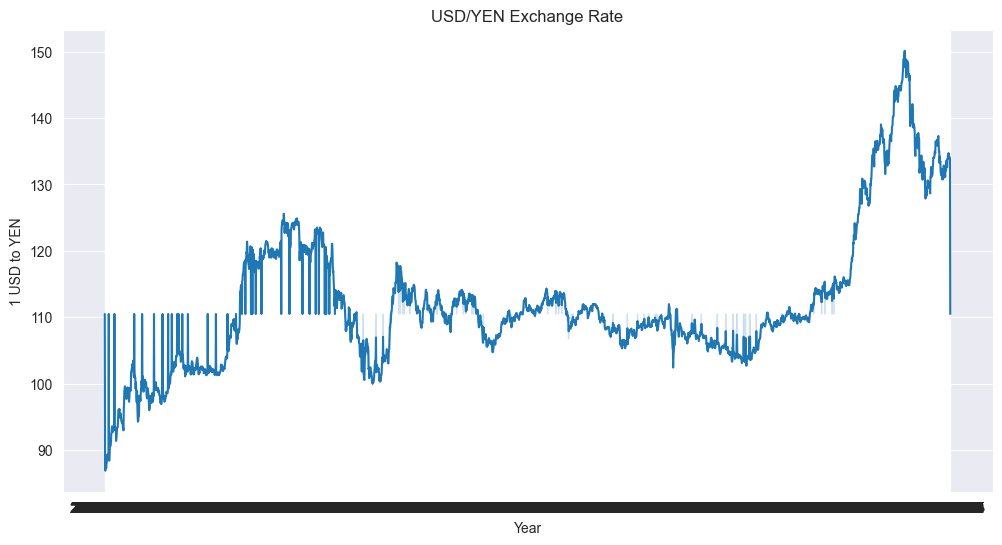

In [47]:

sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x="dates", y="rates", data=exchange_2013_2023, ax=ax)

# set axis labels and plot title
ax.set_xlabel("Year")
ax.set_ylabel("1 USD to YEN")
ax.set_title("USD/YEN Exchange Rate")


# display plot
plt.show()

#purchasing power parity value visualization(only for japan, us ppp = 1)

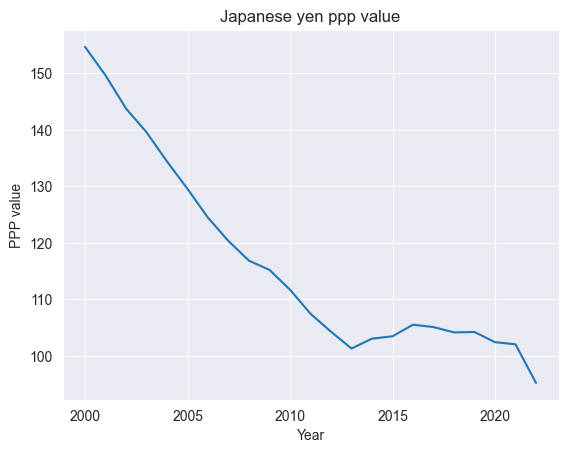

In [49]:
#read ppp value from csv
ppp = pd.read_csv('ppp.csv')
jp_df = ppp[ppp['LOCATION']=='JPN']
jp_ppp = list(jp_df['Value'])
year = list(jp_df['TIME'])
#plotting in data
plt.plot(year,jp_ppp)
plt.xlabel("Year")
plt.ylabel("PPP value")
plt.title("Japanese yen ppp value")
plt.show()

GDP value (US vs JPN)

In [50]:
us_df = pd.read_csv('GDP.csv')
us_df

,DATE,GDP
0,1994-01-01,7115.652
1,1994-04-01,7246.931
2,1994-07-01,7331.075
3,1994-10-01,7455.288
4,1995-01-01,7522.289
...,...,...
111,2021-10-01,24349.121
112,2022-01-01,24740.480
113,2022-04-01,25248.476
114,2022-07-01,25723.941


In [51]:
jp_df = pd.read_csv('JP_GDP.csv')
jp_df

,DATE,GDP
0,1994-01-01,446276.5
1,1994-04-01,443822.8
2,1994-07-01,448928.5
3,1994-10-01,447124.9
4,1995-01-01,452096.3
...,...,...
111,2021-10-01,544376.8
112,2022-01-01,541843.6
113,2022-04-01,548075.3
114,2022-07-01,546607.5


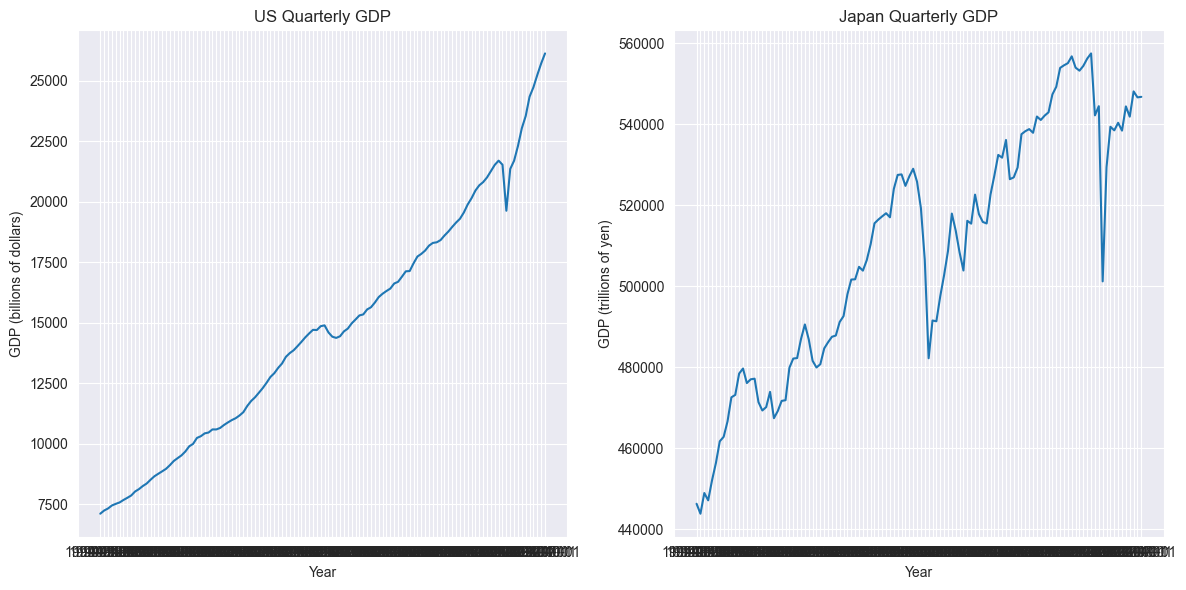

In [52]:
# create two separate line plots side by side
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# plot US GDP data
sns.set_style("darkgrid")
sns.lineplot(x="DATE", y="GDP", data=us_df, ax=axs[0])
axs[0].set_xlabel("Year")
axs[0].set_ylabel("GDP (billions of dollars)")
axs[0].set_title("US Quarterly GDP")

# plot Japan GDP data
sns.set_style("darkgrid")
sns.lineplot(x="DATE", y="GDP", data=jp_df, ax=axs[1])
axs[1].set_xlabel("Year")
axs[1].set_ylabel("GDP (trillions of yen)")
axs[1].set_title("Japan Quarterly GDP")

# display plots
plt.tight_layout()
plt.show()